# SIMPLE LINEAR REGRESSION

- READING AND UNDERSTANDING THE DATA
- TRAINING THE MODEL
- RESIDUAL ANALYSIS 
- PREDICTING AND EVALUATING THE MODEL ON THE TEST SET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [2]:
# read the data
df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


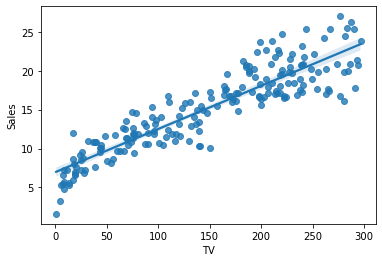

In [6]:
# visualise the dataset
sns.regplot(x='TV',y='Sales',data=df);

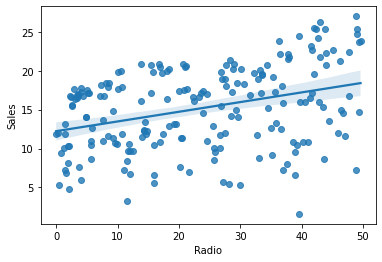

In [7]:
sns.regplot(x='Radio',y='Sales',data=df);

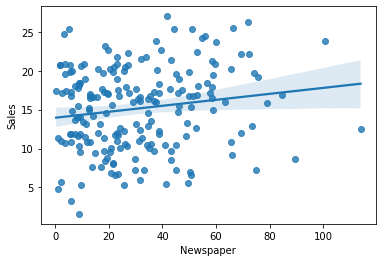

In [8]:
sns.regplot(x='Newspaper',y='Sales',data=df);

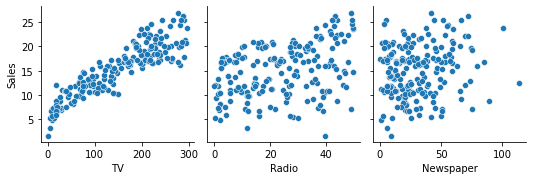

In [9]:
sns.pairplot(data=df , x_vars =['TV','Radio' , 'Newspaper'] , y_vars = 'Sales');

In [10]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


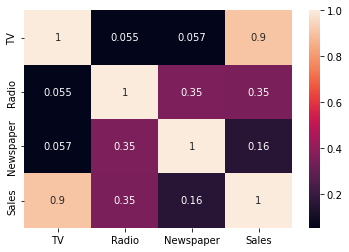

In [11]:
sns.heatmap(df.corr() , annot = True) ;

# Steps
- Create X and Y
- Create train and test sets (70-30 , 80-20 , 75-25)
- Train your model on the training set (i.e. learning the coefficients
- Evaluate the model (training_set , testing_set)

In [12]:
# create X and Y
X = df['TV']
y = df['Sales']

In [13]:
# train-test split
X_train,X_test,y_train,y_test = train_test_split(X , y , train_size = 0.70 , random_state = 100)

In [14]:
#training the model
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [15]:
# y = c + m1.X1
# y = c.const + m1.TV

In [16]:
#fitting model
lr = sm.OLS(y_train , X_train_sm)
lr_model = lr.fit()

In [17]:
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [18]:
#sales = 6.94 + 0.05*TV

In [19]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           1.52e-52
Time:                        22:15:53   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 81 % of variance is being explained by the TV

- Coef and p-value
- R-square is 81.6 % , very high
- p(F-statistic) is low => fit is not by chance and it is statistically significant

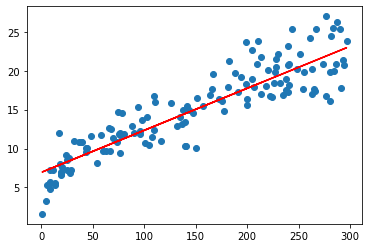

In [20]:
plt.scatter(X_train,y_train) 
plt.plot(X_train, 6.9487+0.054*X_train,'r')
plt.show();

### Residual Analysis

In [21]:
y_train_pred = lr_model.predict(X_train_sm)

In [22]:
y_train_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

In [23]:
res = y_train - y_train_pred

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


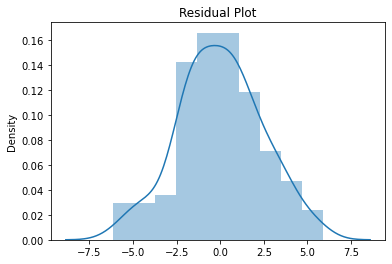

In [24]:
#plot residuals
plt.figure()
sns.distplot(res) 
plt.title("Residual Plot") ;

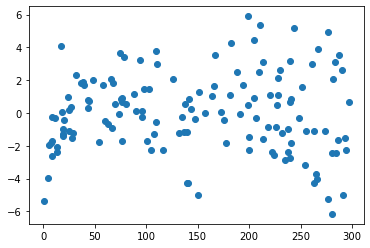

In [25]:
# look for patterns in the residuals (we should not be able to identify)
plt.scatter(X_train , res)
plt.show()

In [26]:
 #Make predictions on test set (y_pred_test)
 #Evaluate the model , r-squared on the test

In [27]:
#add constant/intercept to test set
X_test_sm = sm.add_constant(X_test)

In [28]:
#pred on test
y_test_pred = lr_model.predict(X_test_sm)

In [29]:
#r-squared
r2 = r2_score(y_true = y_test , y_pred = y_test_pred)

In [30]:
r2

0.7921031601245658

In [31]:
r2_score(y_true = y_train , y_pred = y_train_pred)

0.8157933136480389

In [32]:
#mean squared error
mean_squared_error(y_true = y_train , y_pred = y_train_pred)

5.752400386486836

In [33]:
mean_squared_error(y_true = y_test , y_pred = y_test_pred)

4.077556371826956

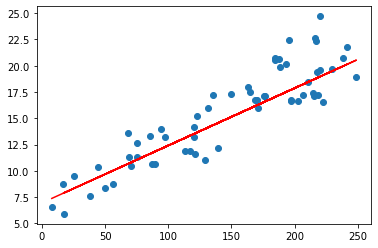

In [34]:
plt.scatter(X_test , y_test)
plt.plot(X_test , y_test_pred , 'r')
plt.show()

# Linear Regression using sklearn

In [39]:
#reshape X_train to (140,1)
X_train_lm = X_train.values.reshape(-1,1)
X_test_lm = X_test.values.reshape(-1,1)

In [40]:
X_train_lm.shape

(140, 1)

In [41]:
# steps in sklearn model building

# 1. create an object of linear regression
lm = LinearRegression()

# 2. fit the model
lm.fit(X_train_lm , y_train)

LinearRegression()

In [44]:
# 3. see params , make predictions (train,test)
print(lm.coef_)
print(lm.intercept_)


[0.05454575]
6.94868320000136


In [45]:
# make predictions
y_train_pred = lm.predict(X_train_lm) 
y_test_pred = lm.predict(X_test_lm) 

In [47]:
#evaluate the model
print(r2_score(y_true = y_train , y_pred = y_train_pred))
print(r2_score(y_true = y_test , y_pred = y_test_pred))

0.8157933136480388
0.792103160124566
